In [29]:

class BinaryController:
    """
    Binary controller class
    eg for soil humidity controller
        settings :
        - soil humidity minimum = 20
        - soil humidity maximum = 70
        - reverse = False
        if sensor = 21  will return signal=1 until sensor reach 70
        when reached 70, lock to return signal=0 until sensor reach 20.
        Lock is used to reduce the rate of switch OFF/ON by minutes
        in order to increase durability of component
    """

    def __init__(self):
        self._min = None
        self._max = None
        self.lock = None
        self.reverse = None

    def set_conf(
            self,
            _min: float,
            _max: float,
            reverse: bool = False
    ):

        assert isinstance(float(_min), float)
        assert isinstance(float(_max), float)
        assert isinstance(reverse, bool)

        self._min: float = _min
        self._max: float = _max
        self.reverse: bool = reverse

        self.lock: bool = False

    def __lock(self, sensor):
        if sensor >= self._max:
            self.lock = True

    def __unlock(self, sensor):
        if sensor <= self._min:
            self.lock = False

    def get_signal(self, sensor):
        assert isinstance(float(sensor), float)

        self.__lock(sensor)
        self.__unlock(sensor)

        if not self.reverse:
            if (
                    self._min < sensor <= self._max
                    and
                    not self.lock
            ):
                return 1
            elif sensor <= self._min:
                return 1
            else:
                return 0

        if self.reverse:
            if (
                    self._min < sensor <= self._max
                    and
                    not self.lock
            ):
                return 1

            elif sensor >= self._max:
                return 1
            else:
                return 0

In [ ]:
ctl = BinaryController()
ctl.set_conf(0.2,0.5, True)
ctl.proc(0.21)

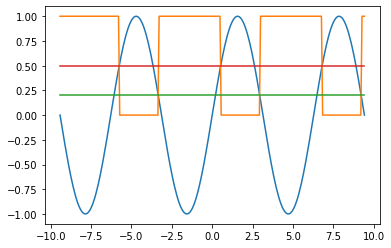

In [30]:
from pylab import *

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
X = 3*X
C,S = np.cos(X), np.sin(X)
ctl = BinaryController()
ctl.set_conf(0.2,0.5, False)

signal = []
for _ in S:
    signal.append(ctl.get_signal(_))
    
_max = []
for _ in range(len(S)):
    _max.append(0.5)

_min = []
for _ in range(len(S)):
    _min.append(0.2)
    
plot(X,S)
plot(X,signal)
plot(X, _min)
plot(X, _max)
show()


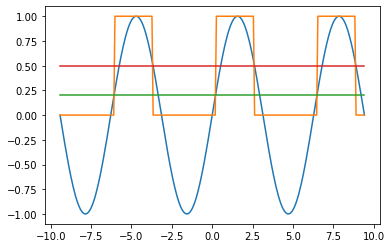

In [31]:
from pylab import *

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
X = 3*X
C,S = np.cos(X), np.sin(X)
ctl = BinaryController()
ctl.set_conf(0.2,0.5, True)

signal = []
for _ in S:
    signal.append(ctl.get_signal(_))
    
_max = []
for _ in range(len(S)):
    _max.append(0.5)

_min = []
for _ in range(len(S)):
    _min.append(0.2)
    
plot(X,S)
plot(X,signal)
plot(X, _min)
plot(X, _max)
show()


In [ ]:
s = list(S)
import _pickle
_pickle.dump(s, open('sign_list.pkl', 'wb'))